# Introduction to Statistical Hypothesis Testing
 
### Examples: 

1. If an engineer has to decide on the basis of sample data whether the true average lifetime of a certain kind of tire is 22,000 miles;  
 
2. If an agronomist has to decide on the basis of experiments whether one kind of fertilizer produces a higher yield of soybeans than another; 

 
 These problems can all be translated into the language of **statistical tests of hypotheses**

In [ ]:
2+2

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import distributions as dists
import numpy as np
import seaborn as sns

## Excercise 1

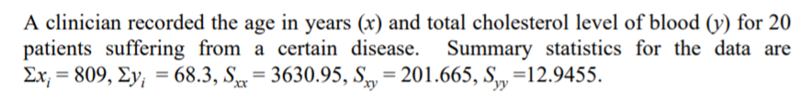

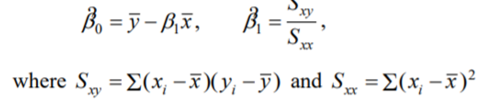

#### Find the equation of the fitted linear regression model.

In [9]:
# Given:
n=20
sumx=809
sumy=68.3
Sxx=3630.95
Sxy=201.665
Syy=12.9455

# therefore:
meanx=sumx/n
meany=sumy/n
beta1=Sxy/Sxx
beta0=meany-beta1*meanx

print ("Y-intercept is: ",beta0)
print ("Slope is:",beta1 )

total_sum_of_square = Syy
regression_sum_of_square = beta1*Sxy
residual_sum_of_square = Syy - beta1*Sxy

print("Total Sum of Square: ", total_sum_of_square)
print("Regression Sum of Square: ", regression_sum_of_square)
print("Residual Sum of Square: ", residual_sum_of_square)


print("Mean Square of Regression : ", regression_sum_of_square/1)
print("Mean Square of Residual : ", residual_sum_of_square/(n-1-1))

print("F Value is: ", (regression_sum_of_square/1)/(residual_sum_of_square/(n-1-1)))


# for F distribution

fcritical = dists.f.ppf(1-0.001,1,18)       # F statistics with DF regression = 1, Residual =18
print("The critical value for 0.1% significant level is: ",fcritical)

Y-intercept is:  1.1683843071372504
Slope is: 0.055540561010203944
Total Sum of Square:  12.9455
Regression Sum of Square:  11.200587236122779
Residual Sum of Square:  1.7449127638772204
Mean Square of Regression :  11.200587236122779
Mean Square of Residual :  0.09693959799317892
F Value is:  115.54191958698756
The critical value for 0.1% significant level is:  15.379305977407743


Since the F Value is 115.5, which is greater then the critical value of 15.3, we reject the null hypothesis in favor of alternative hypothesis
<br>Null hypothesis is beta1 = 0, alternative hypothesis is beta1 =/= 0

## Excercise 2

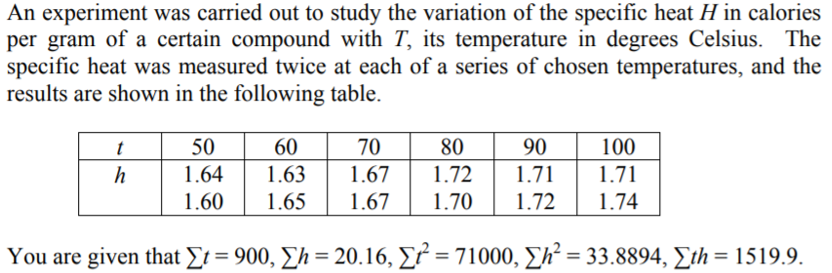

#### a) Draw a scatter diagram of the data and comment briefly on the suitability of carrying out a simple linear regression analysis on these data.

In [10]:
#Given:
t = [50,50, 60,60, 70,70, 80,80, 90,90, 100,100]
h = [ 1.64, 1.6,1.63, 1.65, 1.67, 1.67, 1.72,1.70 , 1.72, 1.71, 1.74,1.71]
sumt=900
sumh=20.16
sumt2=71000
sumh2=33.8894
sumth=1519.9

<function matplotlib.pyplot.show>

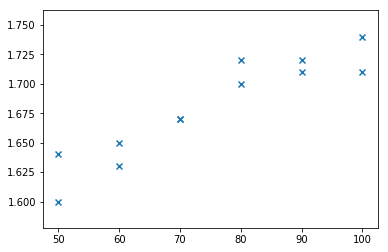

In [11]:
plt.scatter (t,h,marker="x")
plt.show

The data follow a broadly linear increasing trend with roughly constant scatter. 
<br>It is reasonable to assume that the temperature is preset by the experimenters. 


#### b) Fit a simple linear regression model to the data, stating any assumptions made for the purpose of the analysis. Also give a point prediction for the specific heat when T=85.

Spec heat prediction for T=85 is 1.7025714285714275


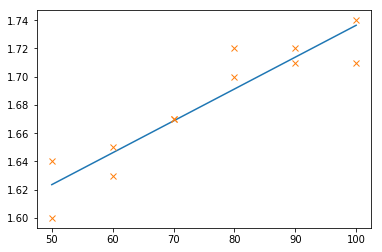

In [13]:
z=np.polyfit(t,h,1)   # get slope and intercept (dof =1)
p=np.poly1d(z)
hpred=p(t)
plt.plot(t,hpred,t,h,'x')
print ("Spec heat prediction for T=85 is "+str(p(85)))

## Excercise 3

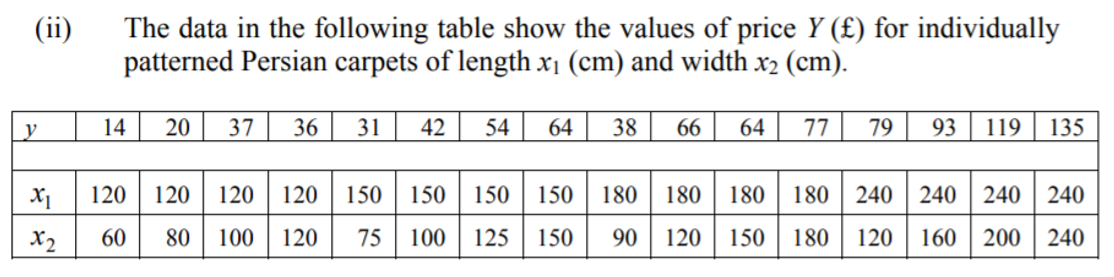

#### a) Plot scatter diagrams of price against each length and width. What do these graphs show?

In [14]:
y = [14, 20, 37, 36, 31, 42, 54, 64, 38, 66, 64, 77, 79, 93, 119, 135]   # price
x1 = [120, 120, 120, 120, 150, 150, 150, 150, 180, 180, 180, 180, 240, 240, 240, 240]   # length
x2 = [60, 80, 100, 120, 75, 100, 125, 150, 90, 120, 150, 180, 120, 160, 200, 240]        # width

Text(0,0.5,'price')

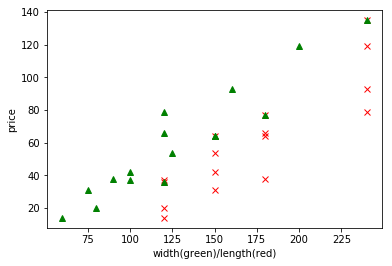

In [15]:
plt.plot(x1,y,'rx',x2,y,'g^')
plt.xlabel('width(green)/length(red)')
plt.ylabel('price')

The graphs show a tendency for price to increase roughly linearly as either width or length increases. 
<br>There may be more scatter in the plot against length and a slight tendency for this to increase with length, 
<br>but these features may be due to the dependence of price on width

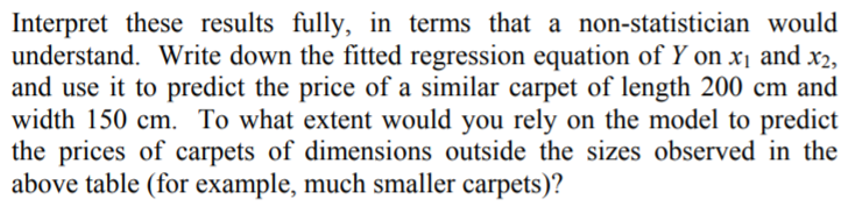

In [11]:
df=pd.DataFrame.from_records([x1,x2,y],["x1","x2","y"]).transpose()
result=smf.ols('y~x1+x2', data=df).fit()  # use statsmodels.formula.api, dataframe, y is target variable and x is predictor
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     300.4
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           1.31e-11
Time:                        06:17:06   Log-Likelihood:                -47.804
No. Observations:                  16   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -52.6714      5.345     -9.854      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [16]:
# for F distribution

fcritical = dists.f.ppf(1-0.001,2,13)              # F statistics with DF regression = 2, Residual =13
print("The critical value for 0.1% significant level is: ",fcritical)

The critical value for 0.1% significant level is:  12.31272981065888


From result summary, the F-stat value is 300.4. which is larger than the critical value of 12.31.
<br>Therefore we reject the null hypothesis of (beta0=beta1=beta2=0) in favour of alternative hypothese, taking 0.1% significant level.
<br>The p-values for length and width are all smaller than 0.1%, we reject the null hypothesis(beta_1=0, beta_2=0)<br> in favor of alternative hypothesis (beta_1 <>0,beta_2 <>0)
<br>The R-squared = 0.98 which means 98% of Y is explained by the model
<br>In summary, the fitted multiple linear model is useful for making prediction on price based on length and width

In [19]:
dfnew=pd.DataFrame({"x1":[200],"x2":[150]})
predictions=result.predict(dfnew)
print ("Predicted price for L=200, W=150 is $",float(predictions))

Predicted price for L=200, W=150 is $ 78.61428571428574


Negative predicted prices will be given for sufficiently small carpets, since the constant term is −52.671, and such results are obviously unreasonable.
<br>This illustrates the danger of extrapolation, or assuming that the model necessarily holds for values of the predictor variables well away from the observed data used to fit it. 

## Excercise 4

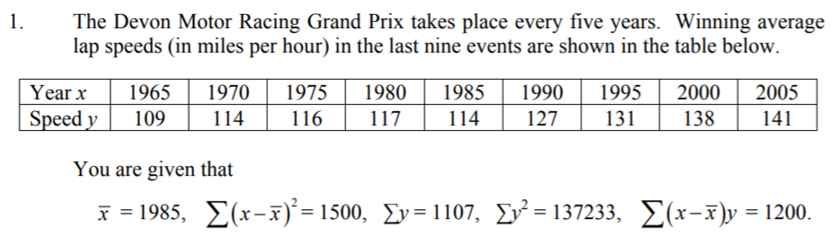

#### a) Plot these data and comment briefly the suitablity of a simple linear regression analysis.

In [22]:
#Given:
year = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]
speed = [109, 114, 116, 117, 114, 127, 131, 138, 141]
xmean=1985
Sxx=1500
sumy=1107
sumy2=137233
Sxy=1200

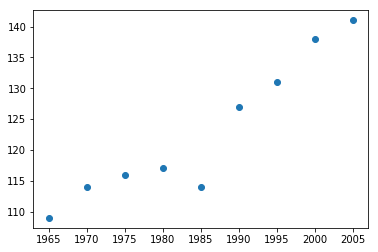

In [23]:
plt.scatter(year,speed)

There is an outlier in x = 1985, the linear effect should be more strong if we remove the outlier data

#### b) Fit a simple linaer regression model and state its equation. Also compute the total sum of squares and regression sum of squares for this regression, and deduce the error mean square.

In [24]:
df=pd.DataFrame({'year':year,'speed':speed})
result=smf.ols('speed~year', data=df).fit()  # use statsmodels.formula.api, dataframe, y is target variable and x is predictor
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     60.00
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           0.000112
Time:                        10:36:54   Log-Likelihood:                -24.116
No. Observations:                   9   AIC:                             52.23
Df Residuals:                       7   BIC:                             52.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1465.0000    205.014     -7.146      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


#### Linear Model

y_hat = -1465 +0.8x

In [25]:
#Given:
year = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]
speed = [109, 114, 116, 117, 114, 127, 131, 138, 141]
xmean=1985
Sxx=1500
sumy=1107
sumy2=137233
Sxy=1200

# Deduce:
sumx  = sum(year)
sumx2 = sum([i**2 for i in year])
Syy   = sumy2-sumy**2/len(year)

beta1 = Sxy/Sxx
beta0 = sumy/len(year) - beta1*sumx/len(year)

totalsumofsq      = Syy
regressionsumofsq = beta1**2*Sxx
residualsumofsq   = totalsumofsq - regressionsumofsq
errorsumofsq      = Syy - beta1*Sxy

print ("SST: ",totalsumofsq,"\nSSR: ",regressionsumofsq, "\nSSres: ",residualsumofsq,"\nSSE: ",errorsumofsq/(len(year)-2))

SST:  1072.0 
SSR:  960.0000000000002 
SSres:  111.99999999999977 
SSE:  16.0


#### c) It is later noted that driving conditions in 1985 were affected by a freak thunderstorm which caused partial flooding of the track. The 1985 values were therefore omitted. Calculate the new linear model.

In [26]:
df_adj=df.drop(df.index[4])  # remove outlier @ 1985
df_adj

,speed,year
0,109,1965
1,114,1970
2,116,1975
3,117,1980
5,127,1990
6,131,1995
7,138,2000
8,141,2005


In [27]:
#find new model summary

newresult=smf.ols('speed~year', data=df_adj).fit()  # use statsmodels.formula.api, dataframe, y is target variable and x is predictor
print(newresult.summary())

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           3.04e-06
Time:                        10:36:57   Log-Likelihood:                -15.188
No. Observations:                   8   AIC:                             34.38
Df Residuals:                       6   BIC:                             34.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1463.8750     95.601    -15.312      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


#### Linear Model (new)

y_hat = -1463.875 +0.8x

#### d) Use the analysis above to estimate:
#### - the expected winning speed in 1985
#### - the expected winning speed in 2010
#### - the time which a winning speed of 160 mph might be expected

#### Mention any reservations you might have above the answers.

In [28]:
# estimate expected winning speed at 1985 and 2010

predrecord = pd.DataFrame({'year':[1985,2010]})
predresult = newresult.predict(predrecord)

print("Exptected result to win in 1985 is: ",predresult[0],"\nExptected result to win in 2010 is: ",predresult[1])

Exptected result to win in 1985 is:  124.12499999999932 
Exptected result to win in 2010 is:  144.12499999999932


In [29]:
# Which year is expected winning speed of 160
# The equation is : 160 = -1463.875 + 0.8x

from sympy.solvers import solve
from sympy import Symbol

x = Symbol('x')
ans = solve(-1463.875+0.8*x-160, x)

print("The time by which a winning speed of 160mph is in Year:", round(float(ans[0])))

The time by which a winning speed of 160mph is in Year: 2030


In [30]:
df_adj.describe().loc[['min','max']]

,speed,year
min,109.0,1965.0
max,141.0,2005.0


Notice that in (b) the year 2010 is outside the range of year
<br>and in (c) the speed is outside the range of speed,
<br>both would cause extrapolating beyond the range of the data,
<br>therefore, assuming that the fitted trend continues to apply in the future, which may not be true


## Excercise 5

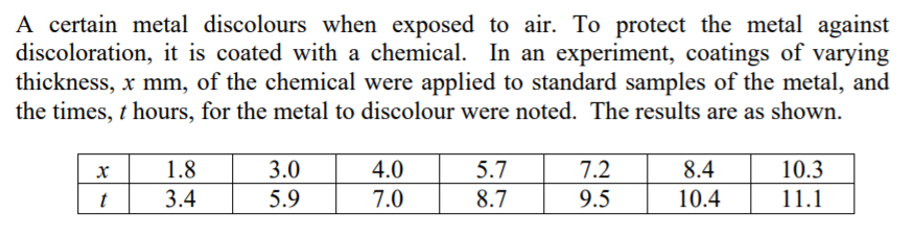

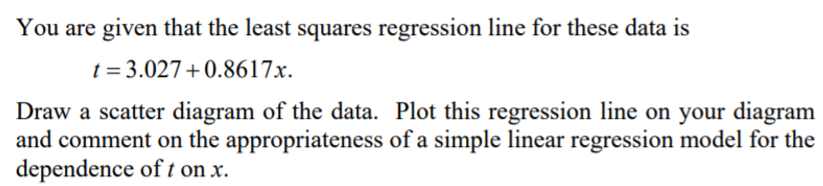

In [31]:
x = [1.8, 3, 4, 5.7, 7.2, 8.4, 10.3]
t = [3.4, 5.9, 7, 8.7, 9.5, 10.4, 11.1]
#given t=3.027+0.8617x
m=0.8617
c=3.027

tpred=[i*m+c for i in x]

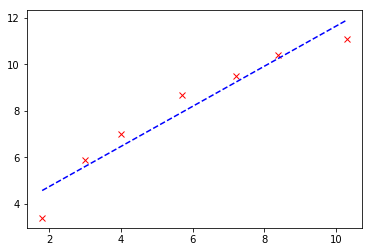

In [32]:
plt.plot(x,t,"rx",x,tpred,"b--")

In [33]:
df=pd.DataFrame({'x':x,"t":t})
result=smf.ols('t~x',data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     67.97
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           0.000428
Time:                        10:40:00   Log-Likelihood:                -7.0382
No. Observations:                   7   AIC:                             18.08
Df Residuals:                       5   BIC:                             17.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0270      0.672      4.506      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


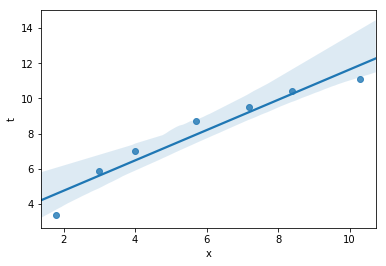

In [52]:
sns.regplot(x='x',y='t',data=df)

Values of t show a strong increasing trend with x, 
but the trend appears to be a curve with decreasing gradient, rather than a straight line. 
It appears that the straight line model will underestimate the value of t in the middle of the range of x 
but overestimate the value of t for low or high values of x. 

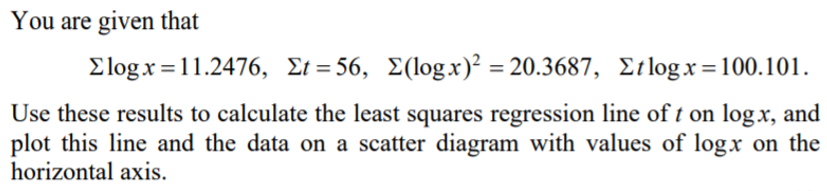

In [57]:
sumlogx=11.2476
sumt=56
sumlogx2=20.3687
sumttlogx=100.101

print(x)
print(np.log(x))

# Given t = a + b log x

df2=pd.DataFrame({"logx":np.log(x),"t":t})
results2=smf.ols("t~logx",data=df2).fit()
print(results2.summary())

[1.8, 3, 4, 5.7, 7.2, 8.4, 10.3]
[ 0.58778666  1.09861229  1.38629436  1.74046617  1.97408103  2.12823171
  2.3321439 ]
                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2847.
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.37e-08
Time:                        08:59:28   Log-Likelihood:                 5.7922
No. Observations:                   7   AIC:                            -7.584
Df Residuals:                       5   BIC:                            -7.693
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


#### Formula: y = 0.9181 + 4.4074 log x 

In [90]:
LOGX=[0.5,1,1.5,2,2.5]             # create line y = 0.9181 + 4.074 log x 
Y=[(0.9181+4.4074*i) for i in LOGX]

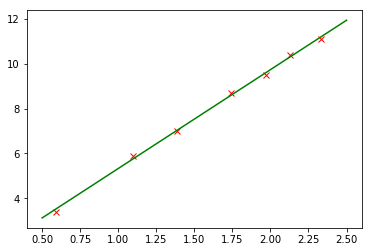

In [91]:
plt.plot(np.log(x),t,"rx",X,Y,"g-")

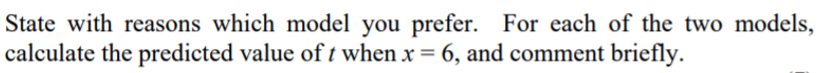

In [104]:
# Predict value using both method
# Method 1: OLS

newrecord=pd.DataFrame({'x':[6]})
print ("Predicted value of t when x=6 using OLS is :",float(result.predict(newrecord)))


# Method 2: using formula
newrecord=pd.DataFrame({'logx':[math.log(6)]})
print ("Predicted value of t when x=6 using OLS(log x) is :",float(results2.predict(newrecord)))

Predicted value of t when x=6 using OLS is : 8.196951934349357
Predicted value of t when x=6 using OLS(log x) is : 8.815186154079214


As expected for this middle-range value of x, the first model under-predicts compared with the second, by about 0.6. 
<br>The discrepancy far exceeds the observable scatter for the second model, reinforcing the superiority of the second model. 

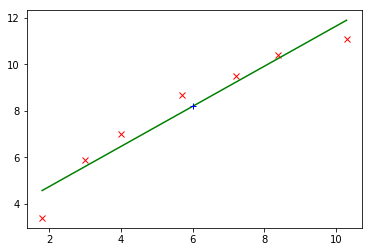

In [118]:
plt.plot(x,t,"rx",x,tpred,"g-",[6],[8.196951934349357],'b+')

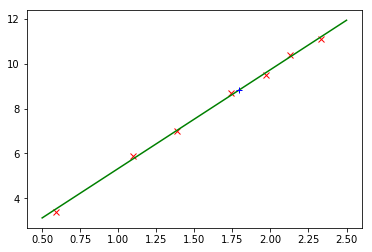

In [116]:
plt.plot(np.log(x),t,"rx",X,Y,"g-",[math.log(6)],[8.815186154079214],'b+')

### Exercise 6

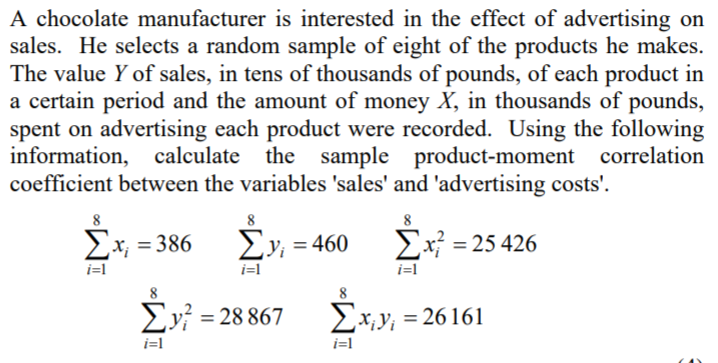

In [2]:
## 
sumofx = 386
sumofy = 460
sumofx2 = 25426
sumofy2 = 28867
sumofxy = 26161
n = 8

Sxx = sumofx2 - (sumofx)**2/n
Syy = sumofy2 - (sumofy)**2/n
Sxy = sumofxy - (sumofx*sumofy)/n

r = Sxy/math.sqrt(Sxx*Syy)
r

0.9781648070201413

Check the table of critical values for Pearson correlation coefficient

Reference: http://www.radford.edu/~jaspelme/statsbook/Chapter%20files/Table_of_Critical_Values_for_r.pdf

The critical value for 1% significant level for degree of freedom = 8-2 = 6, is 0.789,
which is smaller then the calculated value of 0.978.

Therefore, we will reject the null hypothesis that Pearson correlation coefficent =0 and favor the alternative hypothesis that Pearson correlation coefficient >0

In [3]:
## By Calculation

x = [2.3,5.4,6,3,10,12]
y = [5,12,14,7,22.4,25.9]

sumofx = sum(x)
sumofy = sum(y)

sumofx2 = sum([a*b for a,b in zip(x,x)])
sumofy2 = sum([a*b for a,b in zip(y,y)])
sumofxy = sum([a*b for a,b in zip(x,y)])

Sxx = sumofx2 - (sumofx)**2/len(x)
Syy = sumofy2 - (sumofy)**2/len(x)
Sxy = sumofxy - (sumofx*sumofy)/len(x)

r = Sxy/math.sqrt(Sxx*Syy)
r 

0.998718938316758

In [5]:
## By using statistics libraries
from scipy.stats.stats import pearsonr

pearsonr(x,y)

(0.9987189383167582, 2.460627367048062e-06)